In [1]:
import os
os.environ['HF_TOKEN'] ="your_hugging_face_token_here"


# Upload model to Hugging Face
ref: https://huggingface.co/docs/hub/models-uploading

# Create a custom model using transfer learning with ResNet18:

In [2]:
import torch
import torch.nn as nn
from torchvision.models import resnet18
from huggingface_hub import PyTorchModelHubMixin

class CustomModel(nn.Module, PyTorchModelHubMixin):
    def __init__(self, config: dict):
        super().__init__()
        self.resnet = resnet18(pretrained=True)
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_features, config["num_classes"])

    def forward(self, x):
        return self.resnet(x)


config = {"num_classes": 2}

checkpoint = "custom-resnet18-model"
model = CustomModel(config=config)
#model.save_pretrained(checkpoint, config=config)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 56.5MB/s]


CustomModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

# Push the model to Hugging Face using PyTorchModelHubMixin and config:

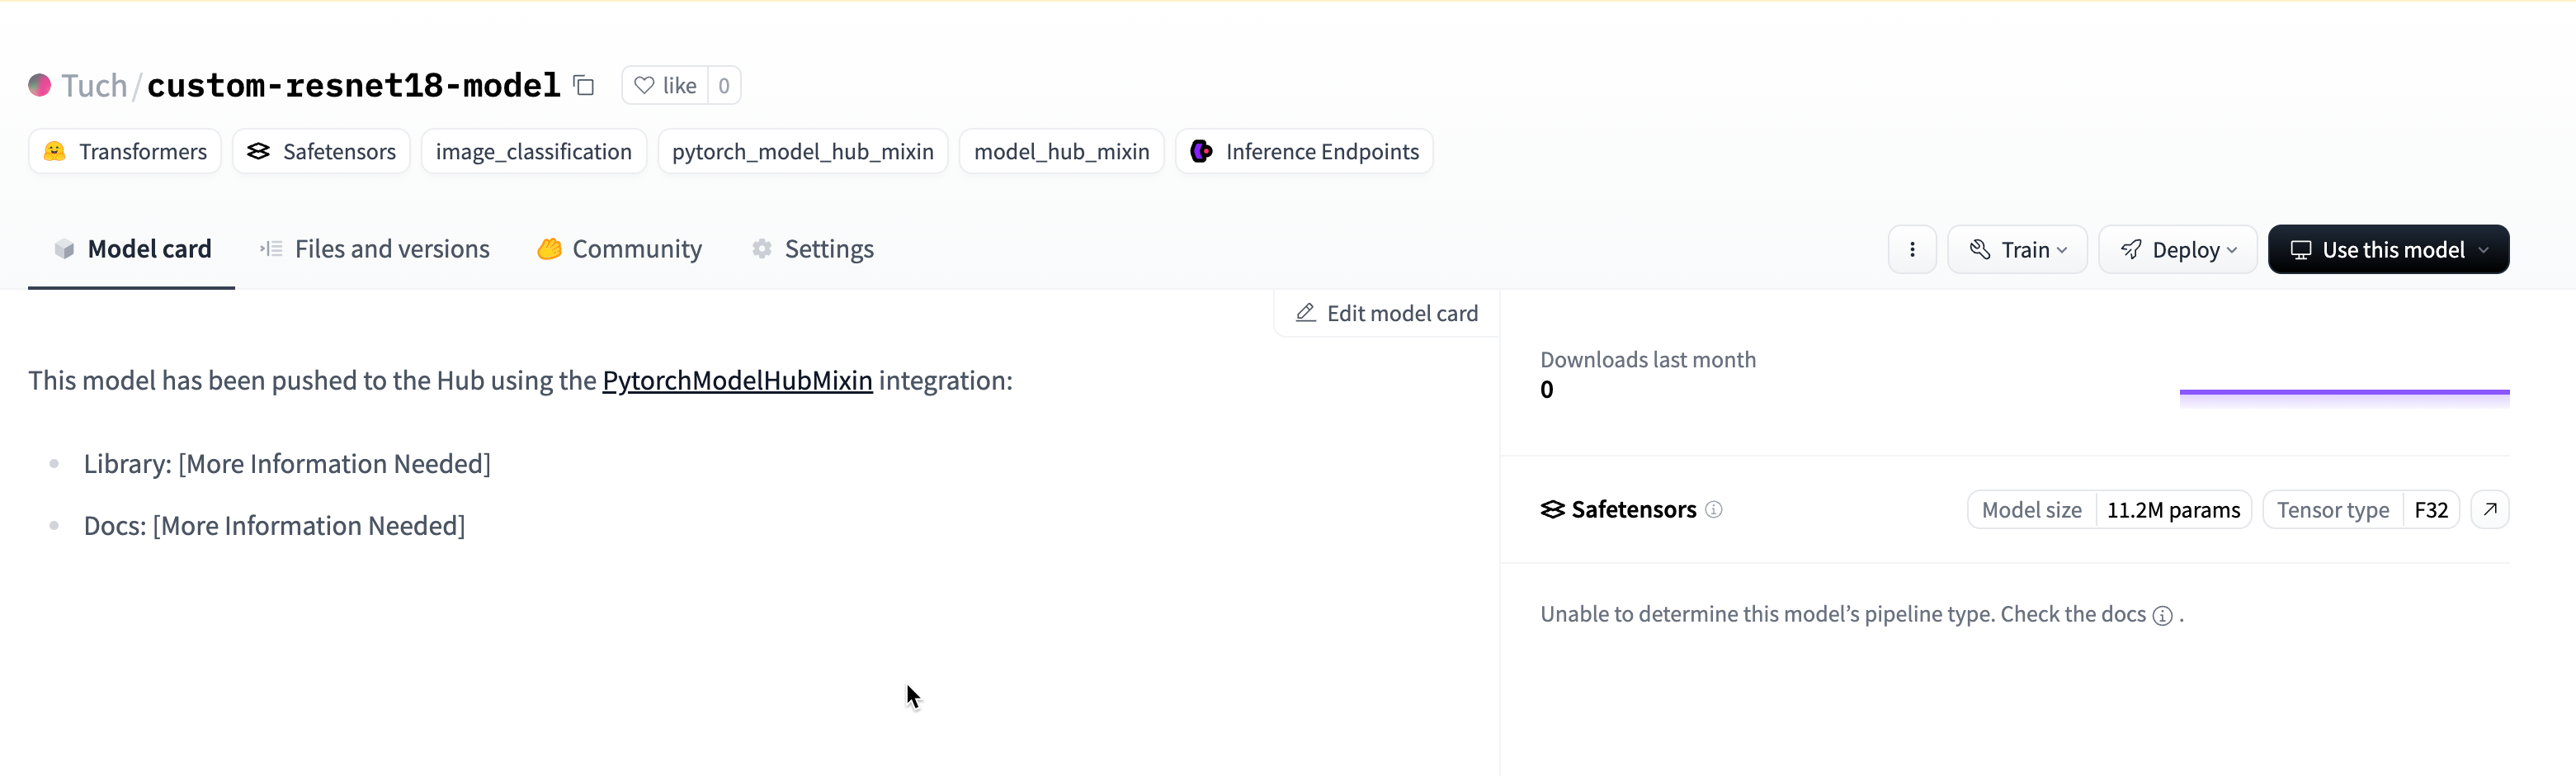

# Push to hub

In [3]:
# save locally

checkpoint = "custom-resnet18-model"


# Push the model to Hugging Face
model.push_to_hub(checkpoint, config=config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/44.8M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Tuch/custom-resnet18-model/commit/30a9728ad18893f06c9897fb4bde63187027c9fc', commit_message='Push model using huggingface_hub.', commit_description='', oid='30a9728ad18893f06c9897fb4bde63187027c9fc', pr_url=None, pr_revision=None, pr_num=None)

# Download the model from Hugging Face

In [4]:
!rm -rf *

In [5]:
import torch
import torch.nn as nn
from torchvision.models import resnet18
from huggingface_hub import PyTorchModelHubMixin

class CustomModel(nn.Module, PyTorchModelHubMixin):
    def __init__(self, config: dict):
        super().__init__()
        self.resnet = resnet18(pretrained=True)
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_features, config["num_classes"])

    def forward(self, x):
        return self.resnet(x)

checkpoint = "Tuch/custom-resnet18-model"
# download from hub
loaded_model1 = CustomModel.from_pretrained(checkpoint)
loaded_model1

config.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/44.8M [00:00<?, ?B/s]

CustomModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_